In [311]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

## Data Collection and Processing

In [312]:
bike_data_march = pl.read_csv("data/original/202203-divvy-tripdata.csv", try_parse_dates=True)
bike_data_march = bike_data_march.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_march.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""47EC0A7F82E65D...","""classic_bike""",2022-03-21 13:45:01,2022-03-21 13:51:18,"""Wabash Ave & W...","""TA1307000131""","""Kingsbury St &...","""KA1503000043""",41.886875,-87.62603,41.889177,-87.638506,"""member""",6m 17s,1
"""8494861979B0F4...","""electric_bike""",2022-03-16 09:37:16,2022-03-16 09:43:34,"""Michigan Ave &...","""13042""","""Orleans St & C...","""620""",41.900998,-87.623752,41.898203,-87.637536,"""member""",6m 18s,3
"""EFE527AF80B661...","""classic_bike""",2022-03-23 19:52:02,2022-03-23 19:54:48,"""Broadway & Ber...","""13109""","""Broadway & Rid...","""15578""",41.978353,-87.659753,41.984045,-87.660274,"""member""",2m 46s,3
"""9F446FD9DEE3F3...","""classic_bike""",2022-03-01 19:12:26,2022-03-01 19:22:14,"""Wabash Ave & W...","""TA1307000131""","""Franklin St & ...","""TA1305000025""",41.886875,-87.62603,41.877708,-87.635321,"""member""",9m 48s,2
"""431128AD9AFFED...","""classic_bike""",2022-03-21 18:37:01,2022-03-21 19:19:11,"""DuSable Lake S...","""LF-005""","""Loomis St & Ja...","""13206""",41.911722,-87.626804,41.877945,-87.662007,"""member""",42m 10s,1


In [313]:
bike_data_april = pl.read_csv("data/original/202204-divvy-tripdata.csv", try_parse_dates=True)
bike_data_april = bike_data_april.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_april.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""3564070EEFD127...","""electric_bike""",2022-04-06 17:42:48,2022-04-06 17:54:36,"""Paulina St & H...","""515""","""University Lib...","""605""",42.019135,-87.673532,42.052939,-87.673447,"""member""",11m 48s,3
"""0B820C7FCF22F4...","""classic_bike""",2022-04-24 19:23:07,2022-04-24 19:43:17,"""Wentworth Ave ...","""13075""","""Green St & Mad...","""TA1307000120""",41.853085,-87.631931,41.881892,-87.648789,"""member""",20m 10s,7
"""89EEEE32293F07...","""classic_bike""",2022-04-20 19:29:08,2022-04-20 19:35:16,"""Halsted St & P...","""TA1307000121""","""Green St & Mad...","""TA1307000120""",41.87184,-87.64664,41.881892,-87.648789,"""member""",6m 8s,3
"""84D4751AEB3188...","""classic_bike""",2022-04-22 21:14:06,2022-04-22 21:23:29,"""Wentworth Ave ...","""13075""","""Delano Ct & Ro...","""KA1706005007""",41.853085,-87.631931,41.867491,-87.63219,"""casual""",9m 23s,5
"""5664BCF0D1DE7A...","""electric_bike""",2022-04-16 15:56:30,2022-04-16 16:02:11,"""Halsted St & P...","""TA1307000121""","""Clinton St & M...","""TA1305000032""",41.871808,-87.646574,41.882242,-87.641066,"""member""",5m 41s,6


In [314]:
bike_data_may = pl.read_csv("data/original/202205-divvy-tripdata.csv", try_parse_dates=True)
bike_data_may = bike_data_may.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_may.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""EC2DE40644C6B0...","""classic_bike""",2022-05-23 23:06:58,2022-05-23 23:40:19,"""Wabash Ave & G...","""TA1307000117""","""Halsted St & R...","""TA1309000025""",41.891466,-87.626761,41.94367,-87.64895,"""member""",33m 21s,1
"""1C31AD03897EE3...","""classic_bike""",2022-05-11 08:53:28,2022-05-11 09:31:22,"""DuSable Lake S...","""13300""","""Field Blvd & S...","""15534""",41.880958,-87.616743,41.886349,-87.617517,"""member""",37m 54s,3
"""1542FBEC830415...","""classic_bike""",2022-05-26 18:36:28,2022-05-26 18:58:18,"""Clinton St & M...","""TA1305000032""","""Wood St & Milw...","""13221""",41.882242,-87.641066,41.907655,-87.672552,"""member""",21m 50s,4
"""6FF59852924528...","""classic_bike""",2022-05-10 07:30:07,2022-05-10 07:38:49,"""Clinton St & M...","""TA1305000032""","""Clark St & Ran...","""TA1305000030""",41.882242,-87.641066,41.884576,-87.63189,"""member""",8m 42s,2
"""483C52CAAE12E3...","""classic_bike""",2022-05-10 17:31:56,2022-05-10 17:36:57,"""Clinton St & M...","""TA1305000032""","""Morgan St & La...","""TA1306000015""",41.882242,-87.641066,41.885779,-87.651025,"""member""",5m 1s,2


In [315]:
bike_data_june = pl.read_csv("data/original/202206-divvy-tripdata.csv", 
                             dtypes={"start_station_id": str, "end_station_id": str}, 
                             try_parse_dates=True)
bike_data_june = bike_data_june.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_june.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""B12AD6565494C3...","""classic_bike""",2022-06-09 22:28:32,2022-06-09 22:52:17,"""California Ave...","""13084""","""California Ave...","""13084""",41.922695,-87.697153,41.922695,-87.697153,"""casual""",23m 45s,4
"""BAD4CB075003A6...","""electric_bike""",2022-06-19 17:08:23,2022-06-19 17:08:25,"""California Ave...","""13084""","""California Ave...","""13084""",41.922613,-87.697148,41.922695,-87.697153,"""casual""",2s,7
"""76DAD9FC95774B...","""electric_bike""",2022-06-26 23:59:44,2022-06-27 00:25:26,"""Burnham Greenw...","""20222""","""Burnham Greenw...","""20222""",41.704628,-87.528414,41.704575,-87.528232,"""casual""",25m 42s,7
"""47DE68ACCA138C...","""electric_bike""",2022-06-27 11:40:53,2022-06-27 11:50:16,"""Wood St & Chic...","""637""","""California Ave...","""13256""",41.895611,-87.672098,41.903029,-87.697474,"""casual""",9m 23s,1
"""5D899636D3334E...","""classic_bike""",2022-06-27 16:01:13,2022-06-27 16:35:56,"""California Ave...","""13256""","""California Ave...","""13256""",41.903029,-87.697474,41.903029,-87.697474,"""casual""",34m 43s,1


In [316]:
bike_data_july = pl.read_csv("data/original/202207-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_july = bike_data_july.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_july.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""954144C2F67B19...","""classic_bike""",2022-07-05 08:12:47,2022-07-05 08:24:32,"""Ashland Ave & ...","""13224""","""Kingsbury St &...","""KA1503000043""",41.907066,-87.667252,41.889177,-87.638506,"""member""",11m 45s,2
"""292E027607D218...","""classic_bike""",2022-07-26 12:53:38,2022-07-26 12:55:31,"""Buckingham Fou...","""15541""","""Michigan Ave &...","""623""",41.869621,-87.623981,41.872773,-87.623981,"""casual""",1m 53s,2
"""57765852588AD6...","""classic_bike""",2022-07-03 13:58:49,2022-07-03 14:06:32,"""Buckingham Fou...","""15541""","""Michigan Ave &...","""623""",41.869621,-87.623981,41.872773,-87.623981,"""casual""",7m 43s,7
"""B5B6BE44314590...","""classic_bike""",2022-07-31 17:44:21,2022-07-31 18:42:50,"""Buckingham Fou...","""15541""","""Woodlawn Ave &...","""TA1307000164""",41.869621,-87.623981,41.795264,-87.596471,"""casual""",58m 29s,7
"""A4C331F2A00E79...","""classic_bike""",2022-07-13 19:49:06,2022-07-13 20:15:24,"""Wabash Ave & G...","""TA1307000117""","""Sheffield Ave ...","""TA1307000052""",41.891466,-87.626761,41.936253,-87.652662,"""member""",26m 18s,3


In [317]:
bike_data_august = pl.read_csv("data/original/202208-divvy-tripdata.csv", 
                            dtypes={"start_station_id": str, "end_station_id": str}, 
                            try_parse_dates=True)
bike_data_august = bike_data_august.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_august.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""241C440C74CB31...","""classic_bike""",2022-08-05 16:13:36,2022-08-05 16:22:40,"""DuSable Museum...","""KA1503000075""","""Cottage Grove ...","""TA1309000067""",41.791568,-87.607852,41.803038,-87.606615,"""casual""",9m 4s,5
"""53A7590B28ED25...","""classic_bike""",2022-08-11 23:30:11,2022-08-11 23:30:56,"""California Ave...","""13084""","""California Ave...","""13084""",41.922695,-87.697153,41.922695,-87.697153,"""casual""",45s,4
"""C34EE790A58C04...","""classic_bike""",2022-08-21 14:09:08,2022-08-21 15:10:46,"""California Ave...","""13256""","""California Ave...","""13256""",41.903029,-87.697474,41.903029,-87.697474,"""casual""",1h 1m 38s,7
"""49259B4BA064D8...","""electric_bike""",2022-08-21 16:15:12,2022-08-21 16:29:30,"""Wood St & Chic...","""637""","""Wood St & Chic...","""637""",41.895673,-87.672075,41.895634,-87.672069,"""casual""",14m 18s,7
"""BEE91D557E47FE...","""classic_bike""",2022-08-21 02:11:26,2022-08-21 03:44:04,"""California Ave...","""13084""","""California Ave...","""13084""",41.922695,-87.697153,41.922695,-87.697153,"""casual""",1h 32m 38s,7


In [318]:
bike_data_september = pl.read_csv("data/original/202209-divvy-tripdata.csv", 
                            dtypes={"start_station_id": str, "end_station_id": str}, 
                            try_parse_dates=True)
bike_data_september = bike_data_september.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls() 
bike_data_september.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""8C94D4680E7B1D...","""electric_bike""",2022-09-10 22:52:54,2022-09-10 22:53:43,"""California Ave...","""13084""","""California Ave...","""13084""",41.922669,-87.697124,41.922695,-87.697153,"""casual""",49s,6
"""7FD174E61EBA0B...","""electric_bike""",2022-09-10 22:58:27,2022-09-10 22:59:20,"""California Ave...","""13084""","""California Ave...","""13084""",41.922665,-87.697161,41.922695,-87.697153,"""casual""",53s,6
"""B23F6CCA8AC89F...","""electric_bike""",2022-09-11 18:35:31,2022-09-11 18:45:57,"""Wood St & Chic...","""637""","""Wood St & Chic...","""637""",41.89561,-87.672195,41.895634,-87.672069,"""casual""",10m 26s,7
"""F7151CAB53DE10...","""classic_bike""",2022-09-05 19:07:10,2022-09-05 20:22:51,"""Burnham Greenw...","""20222""","""Burnham Greenw...","""20222""",41.704575,-87.528232,41.704575,-87.528232,"""casual""",1h 15m 41s,1
"""8E31D0BDDF62F1...","""electric_bike""",2022-09-04 09:03:17,2022-09-04 09:17:15,"""Kenosha & Well...","""361""","""Kenosha & Well...","""361""",41.93,-87.73,41.93,-87.73,"""casual""",13m 58s,7


In [319]:
bike_data_october = pl.read_csv("data/original/202210-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_october = bike_data_october.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_october.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""A50255C1E17942...","""classic_bike""",2022-10-14 17:13:30,2022-10-14 17:19:39,"""Noble St & Mil...","""13290""","""Larrabee St & ...","""KA1504000079""",41.90068,-87.6626,41.903486,-87.643353,"""member""",6m 9s,5
"""DB692A70BD2DD4...","""electric_bike""",2022-10-01 16:29:26,2022-10-01 16:49:06,"""Damen Ave & Ch...","""13288""","""Damen Ave & Cu...","""13089""",41.920037,-87.677937,41.854967,-87.6757,"""casual""",19m 40s,6
"""3C02727AAF60F8...","""electric_bike""",2022-10-19 18:55:40,2022-10-19 19:03:30,"""Hoyne Ave & Ba...","""655""","""Western Ave & ...","""TA1307000140""",41.979879,-87.681902,41.9664,-87.688704,"""member""",7m 50s,3
"""47E653FDC2D992...","""electric_bike""",2022-10-31 07:52:36,2022-10-31 07:58:49,"""Rush St & Ceda...","""KA1504000133""","""Orleans St & C...","""620""",41.902274,-87.627692,41.898203,-87.637536,"""member""",6m 13s,1
"""8B5407BE535159...","""classic_bike""",2022-10-13 18:41:03,2022-10-13 19:26:18,"""900 W Harrison...","""13028""","""Adler Planetar...","""13431""",41.874754,-87.649807,41.866095,-87.607267,"""casual""",45m 15s,4


In [320]:
bike_data_november = pl.read_csv("data/original/202211-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_november = bike_data_november.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_november.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""BCC66FC6FAB27C...","""electric_bike""",2022-11-10 06:21:55,2022-11-10 06:31:27,"""Canal St & Ada...","""13011""","""St. Clair St &...","""13016""",41.879401,-87.639848,41.894345,-87.622798,"""member""",9m 32s,4
"""772AB67E902C18...","""classic_bike""",2022-11-04 07:31:55,2022-11-04 07:46:25,"""Canal St & Ada...","""13011""","""St. Clair St &...","""13016""",41.879255,-87.639904,41.894345,-87.622798,"""member""",14m 30s,5
"""585EAD07FDEC01...","""classic_bike""",2022-11-21 17:20:29,2022-11-21 17:34:36,"""Indiana Ave & ...","""SL-005""","""St. Clair St &...","""13016""",41.867888,-87.623041,41.894345,-87.622798,"""member""",14m 7s,1
"""91C4E7ED3C262F...","""classic_bike""",2022-11-25 17:29:34,2022-11-25 17:45:15,"""Indiana Ave & ...","""SL-005""","""St. Clair St &...","""13016""",41.867888,-87.623041,41.894345,-87.622798,"""member""",15m 41s,5
"""709206A3104CAB...","""classic_bike""",2022-11-29 17:24:25,2022-11-29 17:42:51,"""Indiana Ave & ...","""SL-005""","""St. Clair St &...","""13016""",41.867888,-87.623041,41.894345,-87.622798,"""member""",18m 26s,2


In [321]:
bike_data_december = pl.read_csv("data/original/202212-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_december = bike_data_december.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_december.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""65DBD2F447EC51...","""electric_bike""",2022-12-05 10:47:18,2022-12-05 10:56:34,"""Clifton Ave & ...","""TA1307000163""","""Sedgwick St & ...","""13191""",41.918244,-87.657115,41.922167,-87.638888,"""member""",9m 16s,1
"""0C201AA7EA0EA1...","""classic_bike""",2022-12-18 06:42:33,2022-12-18 07:08:44,"""Broadway & Bel...","""13277""","""Sedgwick St & ...","""13191""",41.940106,-87.645451,41.922167,-87.638888,"""casual""",26m 11s,7
"""E0B148CCB358A4...","""electric_bike""",2022-12-13 08:47:45,2022-12-13 08:59:51,"""Sangamon St & ...","""TA1306000015""","""St. Clair St &...","""13016""",41.885919,-87.651133,41.894345,-87.622798,"""member""",12m 6s,2
"""54C5775D2B7C91...","""classic_bike""",2022-12-13 18:50:47,2022-12-13 19:19:48,"""Shields Ave & ...","""KA1503000038""","""Damen Ave & Ma...","""13134""",41.838464,-87.635406,41.88137,-87.67493,"""member""",29m 1s,2
"""A4891F78776D35...","""classic_bike""",2022-12-14 16:13:39,2022-12-14 16:27:50,"""Ashland Ave & ...","""13247""","""Damen Ave & Ch...","""13288""",41.895954,-87.667728,41.920082,-87.677855,"""casual""",14m 11s,3


In [322]:
bike_data_january = pl.read_csv("data/original/202301-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_january = bike_data_january.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_january.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""F96D5A74A3E413...","""electric_bike""",2023-01-21 20:05:42,2023-01-21 20:16:33,"""Lincoln Ave & ...","""TA1309000058""","""Hampden Ct & D...","""202480.0""",41.924074,-87.646278,41.93,-87.64,"""member""",10m 51s,6
"""13CB7EB698CEDB...","""classic_bike""",2023-01-10 15:37:36,2023-01-10 15:46:05,"""Kimbark Ave & ...","""TA1309000037""","""Greenwood Ave ...","""TA1308000002""",41.799568,-87.594747,41.809835,-87.599383,"""member""",8m 29s,2
"""BD88A2E670661C...","""electric_bike""",2023-01-02 07:51:57,2023-01-02 08:05:11,"""Western Ave & ...","""RP-005""","""Valli Produce ...","""599""",42.008571,-87.690483,42.039742,-87.699413,"""casual""",13m 14s,1
"""C90792D034FED9...","""classic_bike""",2023-01-22 10:52:58,2023-01-22 11:01:44,"""Kimbark Ave & ...","""TA1309000037""","""Greenwood Ave ...","""TA1308000002""",41.799568,-87.594747,41.809835,-87.599383,"""member""",8m 46s,7
"""3397017529188E...","""classic_bike""",2023-01-12 13:58:01,2023-01-12 14:13:20,"""Kimbark Ave & ...","""TA1309000037""","""Greenwood Ave ...","""TA1308000002""",41.799568,-87.594747,41.809835,-87.599383,"""member""",15m 19s,4


In [323]:
bike_data_february = pl.read_csv("data/original/202302-divvy-tripdata.csv", 
                             try_parse_dates=True)
bike_data_february = bike_data_february.with_columns([
    (pl.col("ended_at") - pl.col("started_at")).alias("ride_length"),
    (pl.col("started_at").dt.weekday()).alias("day_of_week")
    ]).drop_nulls()
bike_data_february.head() 

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""CBCD0D7777F0E4...","""classic_bike""",2023-02-14 11:59:42,2023-02-14 12:13:38,"""Southport Ave ...","""TA1309000030""","""Clark St & Sch...","""TA1309000024""",41.920771,-87.663712,41.907993,-87.631501,"""casual""",13m 56s,2
"""F3EC5FCE5FF39D...","""electric_bike""",2023-02-15 13:53:48,2023-02-15 13:59:08,"""Clarendon Ave ...","""13379""","""Sheridan Rd & ...","""TA1309000041""",41.957879,-87.649584,41.969517,-87.654691,"""casual""",5m 20s,3
"""E54C1F27FA9354...","""classic_bike""",2023-02-19 11:10:57,2023-02-19 11:35:01,"""Southport Ave ...","""TA1309000030""","""Aberdeen St & ...","""13156""",41.920771,-87.663712,41.880419,-87.655519,"""member""",24m 4s,7
"""3D561E04F739CC...","""electric_bike""",2023-02-26 16:12:05,2023-02-26 16:39:55,"""Southport Ave ...","""TA1309000030""","""Franklin St & ...","""TA1309000008""",41.920873,-87.663733,41.879434,-87.635504,"""member""",27m 50s,7
"""0CB4B4D53B2DBE...","""electric_bike""",2023-02-20 11:55:23,2023-02-20 12:05:48,"""Prairie Ave & ...","""TA1307000160""","""Cottage Grove ...","""KA1503000054""",41.794827,-87.618795,41.780531,-87.60597,"""member""",10m 25s,1


In [324]:
# Combine all data frames into one
annual_bike_data = pl.concat([bike_data_march, 
                              bike_data_april, 
                              bike_data_may, 
                              bike_data_june,
                              bike_data_july,
                              bike_data_august,
                              bike_data_september,
                              bike_data_october,
                              bike_data_november,
                              bike_data_december,
                              bike_data_january,
                              bike_data_february
                              ])

In [325]:
annual_bike_data.columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual',
 'ride_length',
 'day_of_week']

In [326]:
annual_bike_data.rows

<bound method DataFrame.rows of shape: (4497898, 15)
┌──────────┬────────────┬──────────┬──────────┬─────┬─────────┬────────────┬───────────┬───────────┐
│ ride_id  ┆ rideable_t ┆ started_ ┆ ended_at ┆ ... ┆ end_lng ┆ member_cas ┆ ride_leng ┆ day_of_we │
│ ---      ┆ ype        ┆ at       ┆ ---      ┆     ┆ ---     ┆ ual        ┆ th        ┆ ek        │
│ str      ┆ ---        ┆ ---      ┆ datetime ┆     ┆ f64     ┆ ---        ┆ ---       ┆ ---       │
│          ┆ str        ┆ datetime ┆ [μs]     ┆     ┆         ┆ str        ┆ duration[ ┆ u32       │
│          ┆            ┆ [μs]     ┆          ┆     ┆         ┆            ┆ μs]       ┆           │
╞══════════╪════════════╪══════════╪══════════╪═════╪═════════╪════════════╪═══════════╪═══════════╡
│ 47EC0A7F ┆ classic_bi ┆ 2022-03- ┆ 2022-03- ┆ ... ┆ -87.638 ┆ member     ┆ 6m 17s    ┆ 1         │
│ 82E65D52 ┆ ke         ┆ 21       ┆ 21       ┆     ┆ 506     ┆            ┆           ┆           │
│          ┆            ┆ 13:45:01 ┆ 1

In [327]:
# Remove negative ride length values
annual_bike_data = annual_bike_data.filter(pl.col("ride_length").dt.seconds() >= 0)

In [328]:
annual_bike_data.filter(pl.col("ride_length").dt.days() >= 10)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32
"""23697816035F9A...","""docked_bike""",2022-03-05 19:08:58,2022-03-29 15:43:02,"""Sheffield Ave ...","""TA1306000016""","""Base - 2132 W ...","""Hubbard Bike-c...",41.925602,-87.653708,41.889955,-87.680651,"""casual""",23d 20h 34m 4s,6
"""DC510E6F98003A...","""docked_bike""",2022-07-04 18:37:11,2022-07-27 00:32:38,"""DuSable Lake S...","""13300""","""Green St & Ran...","""chargingstx3""",41.880958,-87.616743,41.883602,-87.648627,"""casual""",22d 5h 55m 27s,1


In [329]:
# Add weekday column to get the day the ride started
annual_bike_data = annual_bike_data.with_columns([
      (pl.col("started_at").dt.strftime('%A')).alias("weekday")
    ])
annual_bike_data.head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,weekday
str,str,datetime[μs],datetime[μs],str,str,str,str,f64,f64,f64,f64,str,duration[μs],u32,str
"""47EC0A7F82E65D...","""classic_bike""",2022-03-21 13:45:01,2022-03-21 13:51:18,"""Wabash Ave & W...","""TA1307000131""","""Kingsbury St &...","""KA1503000043""",41.886875,-87.62603,41.889177,-87.638506,"""member""",6m 17s,1,"""Monday"""
"""8494861979B0F4...","""electric_bike""",2022-03-16 09:37:16,2022-03-16 09:43:34,"""Michigan Ave &...","""13042""","""Orleans St & C...","""620""",41.900998,-87.623752,41.898203,-87.637536,"""member""",6m 18s,3,"""Wednesday"""
"""EFE527AF80B661...","""classic_bike""",2022-03-23 19:52:02,2022-03-23 19:54:48,"""Broadway & Ber...","""13109""","""Broadway & Rid...","""15578""",41.978353,-87.659753,41.984045,-87.660274,"""member""",2m 46s,3,"""Wednesday"""
"""9F446FD9DEE3F3...","""classic_bike""",2022-03-01 19:12:26,2022-03-01 19:22:14,"""Wabash Ave & W...","""TA1307000131""","""Franklin St & ...","""TA1305000025""",41.886875,-87.62603,41.877708,-87.635321,"""member""",9m 48s,2,"""Tuesday"""
"""431128AD9AFFED...","""classic_bike""",2022-03-21 18:37:01,2022-03-21 19:19:11,"""DuSable Lake S...","""LF-005""","""Loomis St & Ja...","""13206""",41.911722,-87.626804,41.877945,-87.662007,"""member""",42m 10s,1,"""Monday"""


## Descriptive Analysis

In [330]:
annual_bike_data["ride_length"].dt.seconds().mean()

1012.7375351530706

In [331]:
annual_bike_data["ride_length"].dt.seconds().median()

628.0

In [332]:
annual_bike_data["ride_length"].dt.seconds().max()

2061244

In [333]:
annual_bike_data["ride_length"].dt.seconds().min()

0

In [334]:
summarized_data = annual_bike_data.groupby(["member_casual", "weekday", "day_of_week"]).agg([
    (pl.count()).alias("number_of_rides"),
    (pl.col("ride_length").dt.seconds().mean()).alias("average_duration"),
    (pl.col("ride_length").dt.seconds().median()).alias("median_duration"),
    (pl.col("ride_length").dt.seconds().max()).alias("max_duration"),
]).sort(by="day_of_week")
summarized_data

member_casual,weekday,day_of_week,number_of_rides,average_duration,median_duration,max_duration
str,str,u32,u32,f64,f64,i64
"""casual""","""Monday""",1,215299,1466.902926,814.0,1922127
"""member""","""Monday""",1,387370,715.650272,510.0,89594
"""casual""","""Tuesday""",2,203095,1263.86525,718.0,349801
"""member""","""Tuesday""",2,434004,700.255081,510.0,87722
"""casual""","""Wednesday""",3,208054,1221.236717,715.0,835693
"""member""","""Wednesday""",3,427602,705.903616,519.0,88415
"""casual""","""Thursday""",4,233376,1262.901867,735.0,607571
"""member""","""Thursday""",4,427665,716.370865,522.0,88538
"""casual""","""Friday""",5,251968,1329.305408,785.0,597741


In [335]:
# Export data to csv
summarized_data.write_csv("./data/summarized_data.csv")

## Visualization

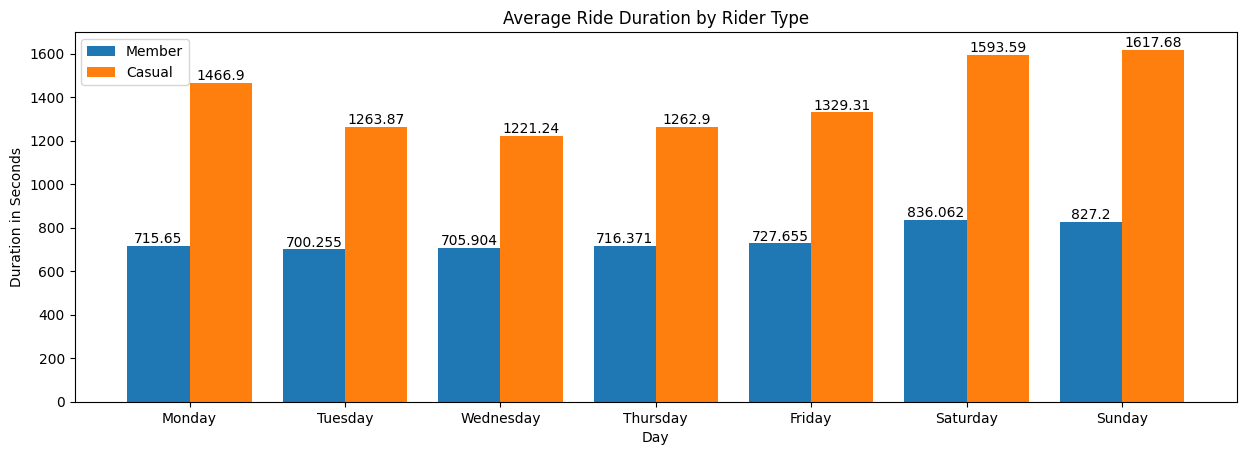

In [336]:
bar_width = 0.4
bar_pairs = np.arange(7)
bar_data_member = summarized_data.filter(pl.col("member_casual") == "member").select(["average_duration"]).to_series()
bar_data_casual = summarized_data.filter(pl.col("member_casual") == "casual").select(["average_duration"]).to_series()
plt.figure().set_figwidth(15)
plt.title("Average Ride Duration by Rider Type")
plt.xlabel('Day')
plt.ylabel('Duration in Seconds')
bar_member = plt.bar(x=bar_pairs, 
        height=bar_data_member, 
        width=bar_width,
        label="Member")
bar_casual = plt.bar(x=bar_pairs + bar_width, 
        height=bar_data_casual, 
        width=bar_width,
        label="Casual")
plt.bar_label(bar_member)
plt.bar_label(bar_casual)
plt.xticks(bar_pairs + bar_width / 2, ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
plt.legend(loc='best')

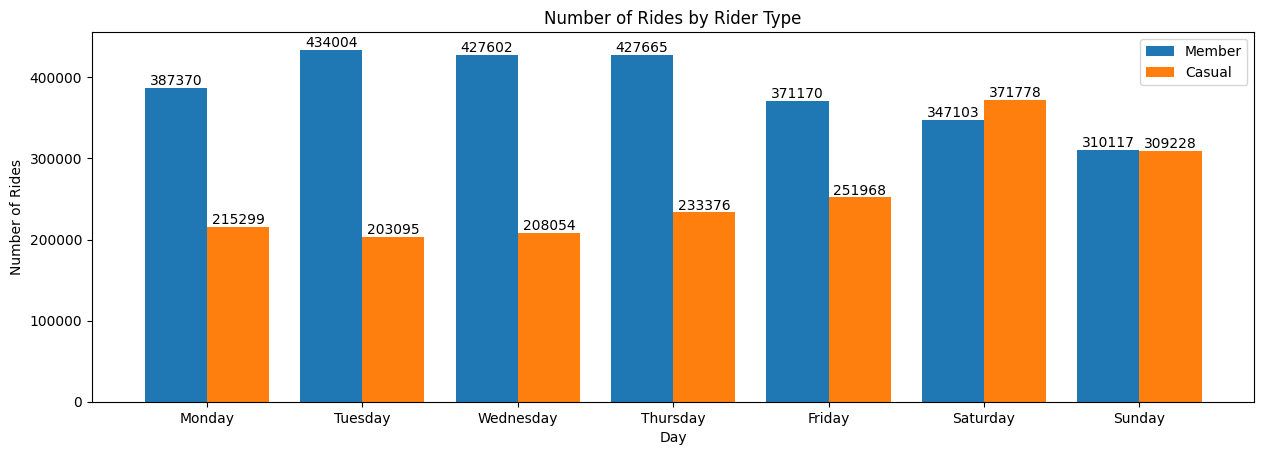

In [337]:
bar_data_member = summarized_data.filter(pl.col("member_casual") == "member").select(["number_of_rides"]).to_series()
bar_data_casual = summarized_data.filter(pl.col("member_casual") == "casual").select(["number_of_rides"]).to_series()
plt.figure().set_figwidth(15)
plt.title("Number of Rides by Rider Type")
plt.xlabel('Day')
plt.ylabel('Number of Rides')
bar_member = plt.bar(bar_pairs, 
        bar_data_member,
        width=bar_width,
        label="Member")
bar_casual = plt.bar(bar_pairs + bar_width, 
        bar_data_casual, 
        width=bar_width,
        label="Casual")
plt.bar_label(bar_member)
plt.bar_label(bar_casual)
plt.xticks(bar_pairs + bar_width / 2, ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
plt.legend(loc='best')